<a href="https://colab.research.google.com/github/thdudgus/Pythons-in-AI/blob/main/240924_linear_regression_blanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression using PyTorch!

# Import Packages

In [1]:
# 진행을 보기 위해
from tqdm.notebook import tqdm

import numpy as np

# 시각화를 위해
import matplotlib.pyplot as plt

# pytorch 관련
import torch  # main pytorch package
import torch.nn as nn # neural network를 위한 pytorch 모델
from torch.utils.data import Dataset, DataLoader # dataset의 위한 pytorch utils

# Make the dataset! add noise to the linear function
- gt_w, gt_b : ground truth weight and bias for linear regression
- x : random points
- y : gt_w * x + gt_b + (gaussian) noise

In [2]:
### linear dataset을 만들기 위함. gt_w, gt_b를 정의
gt_w = 4.0  # linear regression을 위한 ground truth weight
gt_b = -2.0 # linear regression을 위한 ground truth bias

# wx_b에 더하기 위해 data값과 noise값 정의
num_data = 2000
noise_value = 2

#sample some random X (range: -1 ~ 1)
x_range = np.array([-1, 1])
x = np.linspace(x_range[0], x_range[1], num_data) # random data point

# wx+b에 더할 some noise 정의
noise = noise_value * np.random.randn(num_data)
y_raw = gt_w * x + gt_b
y = gt_w * x + gt_b + noise

In [3]:
# without noise
for x_i, y_i in zip(x, y_raw):
  print(x_i, y_i)

#with noise
for x_i, y_i in zip(x, y):
  print(x_i, y_i)

-1.0 -6.0
-0.9989994997498749 -5.995997998999499
-0.9979989994997499 -5.991995997999
-0.9969984992496248 -5.987993996998499
-0.9959979989994997 -5.983991995997998
-0.9949974987493747 -5.979989994997499
-0.9939969984992496 -5.975987993996998
-0.9929964982491246 -5.9719859929964985
-0.9919959979989995 -5.9679839919959985
-0.9909954977488744 -5.963981990995498
-0.9899949974987494 -5.959979989994998
-0.9889944972486243 -5.955977988994498
-0.9879939969984992 -5.951975987993997
-0.9869934967483742 -5.947973986993497
-0.9859929964982491 -5.943971985992997
-0.984992496248124 -5.939969984992496
-0.983991995997999 -5.935967983991996
-0.9829914957478739 -5.931965982991496
-0.9819909954977488 -5.927963981990995
-0.9809904952476238 -5.923961980990495
-0.9799899949974987 -5.919959979989995
-0.9789894947473737 -5.9159579789894945
-0.9779889944972486 -5.9119559779889945
-0.9769884942471235 -5.907953976988495
-0.9759879939969985 -5.903951975987994
-0.9749874937468734 -5.899949974987494
-0.9739869934967

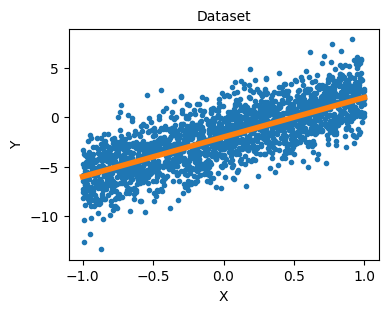

In [5]:
#Plot the data set
plt.figure(figsize=(4,3))
plt.plot(x,y,'.')

#plot the ground truth linear regressor
plt.plot(x_range, x_range*gt_w+gt_b, linewidth=4)

#제목, extras 표시
plt.title('Dataset',fontsize = 10)
plt.xlabel('X',fontsize=10)
plt.ylabel('Y',fontsize=10)
plt.show()

#아래 사진, noise 추가 후

# Define the Pytorch Dataset with x y points
- Define your own class, which inherits from "Dataset" class of pytorch
- Define constructor of the class with `__init__`
- Define the length of the dataset with `__len__`
- Define the function when bringing out the idx-th dataset
    * Return the dictionary containing the input and output of single datapoint


In [8]:
# define the dataset
class XY_Dataset(Dataset):
  def __init__(self,x,y): #초기화 시 데이터셋에 들어갈 입력 x, 출력 y 저장.
    '''
    x : input points
    y : output points
    '''

    self.x = x
    self.y = y
    self.num_data = x.shape[0] # 데이터의 개수 저장.

    # 데이터셋 생성 확인용 출력
    print("built new dataset!")

  def __len__(self): # 데이터셋의 길이(데이터 개수) 반환
    return self.num_data

  def __getitem__(self,idx):  # 주어진 인덱스(idx)에 해당하는 샘플 반환
    sample = dict()  # 딕셔너리로 반환하여 입력x와 출력y를 key로 구분.
    sample['x'] = self.x[idx]
    sample['y'] = self.y[idx]

    # 해당 인덱스의 데이터를 샘플링 할 때마다 "sampled {idx}-th element"메시지 출력
    print("sampled {}-th element.".format(idx))

    return sample

# 앞서 정의한 데이터셋 클래스 x와 y데이터를 전달하여 데이터셋 객체 생성
xy_dataset = XY_Dataset(x,y)

print(xy_dataset.__len__())  # 총 샘플 수 2000 반환
# 인덱스 5와 125에 해당하는 샘플 출력. 각각 호출 시 인덱스에 대한 샘플링 메시지도 함께 출력됨.
print(xy_dataset[5])
print(xy_dataset[125])

built new dataset!
2000
sampled 5-th element.
{'x': -0.9949974987493747, 'y': -7.560685059342071}
sampled 125-th element.
{'x': -0.8749374687343672, 'y': -6.225690613503312}


# Define the dataset, and dataloader
- DataLoader makes you to randomly sample the dataset with a batch size you want.

In [9]:
### Define the batch size you want
batch_size = 8

# DataLoader를 사용하면 원하는 batch 크기로 데이터셋을 랜덤하게 sampling 할 수 있다.
dataset = XY_Dataset(x,y)
dataloader = DataLoader(dataset,batch_size, shuffle= True)

# 0 1 2 3 4 5 ==> shuffle=True ==> 5 2 4 3 1 0 (Random shuffle)
# if batch size == 2
# (5, 2) (4, 3), (1, 0) batches will be returned from....
# for sample in dataloader:....
#     sample : (5,2), (4,3), (1,0)....

### Try sampling out one random data point.
sample = next(iter(dataloader))
print(sample)
print(sample['y'])
print(sample['x'].shape, sample['y'].shape)


built new dataset!
sampled 1248-th element.
sampled 1096-th element.
sampled 78-th element.
sampled 771-th element.
sampled 831-th element.
sampled 731-th element.
sampled 1074-th element.
sampled 1364-th element.
{'x': tensor([ 0.2486,  0.0965, -0.9220, -0.2286, -0.1686, -0.2686,  0.0745,  0.3647],
       dtype=torch.float64), 'y': tensor([-0.6280,  2.5757, -8.9166, -6.5460, -4.6251, -2.1851,  0.1609, -0.6242],
       dtype=torch.float64)}
tensor([-0.6280,  2.5757, -8.9166, -6.5460, -4.6251, -2.1851,  0.1609, -0.6242],
       dtype=torch.float64)
torch.Size([8]) torch.Size([8])


# Initialize the weight and bias.

In [11]:
# initialize the weight and bias here
### Needs requires_grad=True, if you want to make as a parameter to train.


Define a model and initialize the weight and bias


# Define the ''train'' function.

In [16]:
# 해당 변수들의 gradient(변화율) 계산
pred_w = torch.randn(1, requires_grad=True)
pred_b = torch.randn(1, requires_grad=True)

print('initialized w: {}, b:{}'.format(pred_w.item(), pred_b.item()))
print(pred_w)
print(pred_b)

# define the train function
def train(pred_w, pred_b, sample, learning_rate):
    '''
    pred_w, pred_b : weight and biae to train.
    sample : sample from dataloader. dictionary containing 'x' and 'y'.
    learning_rate : the learning rate you want.
    '''
    # 1. 예측 값 계산
    pred_y = pred_w * sample['x'] + pred_b

    # 2. loss function 정의 및 loss 계산
    criteria = nn.MSELoss()
    pred_loss = criteria (pred_y, sample['y']) # 실제 y와 예측 pred_y의 차이를 기반으로 loss 계산

    # 역전파를 통해 기울기 계산
    pred_loss.backward()

    # 4. weight와 편향 업데이트 (with no_gradient)
    with torch.no_grad(): # 이 블록 안에 들어가면 gradient(기울기) 추적 비활성화
      pred_w -= learning_rate * pred_w.grad
      pred_b -= learning_rate * pred_b.grad

    # 5. gradient 초기화 (0으로 설정.)
    pred_w.grad.zero_()
    pred_b.grad.zero_()

    # loss 반환 : 학습과정에서 현재 모델의 성능 평가
    return pred_loss


initialized w: 2.270021677017212, b:-0.23339393734931946
tensor([2.2700], requires_grad=True)
tensor([-0.2334], requires_grad=True)


# Iterate over the dataset! With your ,,train'' function

In [17]:
# define the training process here

# define the maximum epoch
max_epoch = 100
# 각 epoch에서의 loss를 저장할 리스트
loss_saver = list()

saved_w = [] # 중간 결과로 weight 저장
saved_b = [] # 중간 결과로 bias 저


# iterate over the dataset for (max_epoch) times
for epoch in tqdm (range(max_epoch)): # 학습 진행 상황을 진행바 형태로 시각화

  total_loss = 0.0 # 각 에포크 동안의 총 loss 누적.

  for idx, sample in enumerate(dataloader): # dataloader로부터 샘플 추출.
  # 각 미니배치 샘플에 대해 train()함수를 호출
    pred_loss = train (pred_w, pred_b, sample, learning_rate=1e-2) # 예측 및 loss 계산, weight과 bias 갱신
    total_loss += pred_loss.item()/len(dataloader) # 미니배치의 평균 loss 값 누적.
    # pred_loss.item()는 loss 값을 스칼라 값으로 변환.

  loss_saver.append(total_loss) #각 epoch의 총 loss loss_saver 리스트에 저장
  if (epoch+1) % 10 == 0: # 매 10 에포크마다
    # saved_w와 saved_b 리스트에 가중치와 편향 값을 저장
    saved_w.append(pred_w.item())
    saved_b.append(pred_b.item())

    # 현재 epoch 번호, 손실 값, 가중치와 편향의 값을 출력
    print('Epoch : {}, Loss : {}, pred_w: {}, pred_b: {}'.format(epoch+1,
                                                                 total_loss,
                                                                 pred_w.item(),
                                                                 pred_b.item()))

# 최종 train이 끝난 후, 가중치(pred_w)와 편향(pred_b)의 최종 값을 출력
print('Final Prediction: pred_w = {}, pred_b = {}'.format(pred_w.item(), pred_b.item()))

# train이 반복됨에 따라 loss가 점차 감소하고, pred_w와 pred_b가 실제 값에 가까워진다.


  0%|          | 0/100 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
sampled 1013-th element.
sampled 193-th element.
sampled 671-th element.
sampled 686-th element.
sampled 459-th element.
sampled 728-th element.
sampled 210-th element.
sampled 647-th element.
sampled 737-th element.
sampled 1126-th element.
sampled 1747-th element.
sampled 31-th element.
sampled 817-th element.
sampled 653-th element.
sampled 1664-th element.
sampled 554-th element.
sampled 791-th element.
sampled 1683-th element.
sampled 1744-th element.
sampled 1285-th element.
sampled 325-th element.
sampled 1619-th element.
sampled 1401-th element.
sampled 1686-th element.
sampled 824-th element.
sampled 1874-th element.
sampled 1284-th element.
sampled 904-th element.
sampled 28-th element.
sampled 720-th element.
sampled 1068-th element.
sampled 1326-th element.
sampled 912-th element.
sampled 1344-th element.
sampled 1042-th element.
sampled 1912-th element.
sampled 1550-th element.
sampled 1031-th element.
sampled 1757-th element.
sampled 18

# Plot the result : training loss and resulted linear regressor

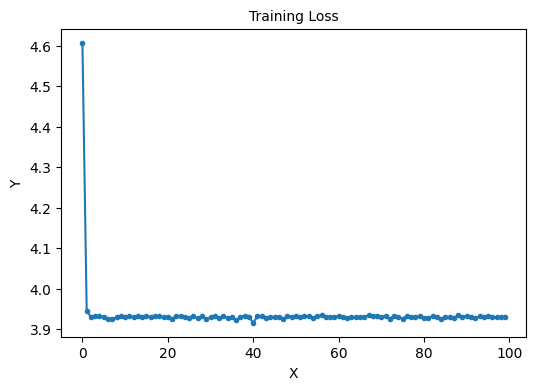

In [19]:
# plot the result: training loss

# (이전 train 코드에서 각 epoch마다 계산된 loss값을 저장한 리스트)
loss_saver = np.array(loss_saver)  # loss 값을 NumPy 배열로 변환
plt.figure(figsize=(6, 4))  # 그래프의 크기 설정
plt.plot(np.arange(len(loss_saver)), loss_saver, '.-')  # x축: epoch 번호, y축: loss 값
plt.title('Training Loss', fontsize=10)  # 그래프 제목 설정
plt.xlabel('X', fontsize=10)  # X축 label
plt.ylabel('Y', fontsize=10)  # Y축 label
plt.show()  # 그래프 출력

위 그래프는 linear regression 모델의 train 과정에서 loss값이 점진적으로 감소하고 수렴되는 모습.    
초기 train 속도가 빠르고, 이후에는 loss가 거의 일정하게 유지되는 것을 통해 모델이 충분히 train되었음을 확인할 수 있음.

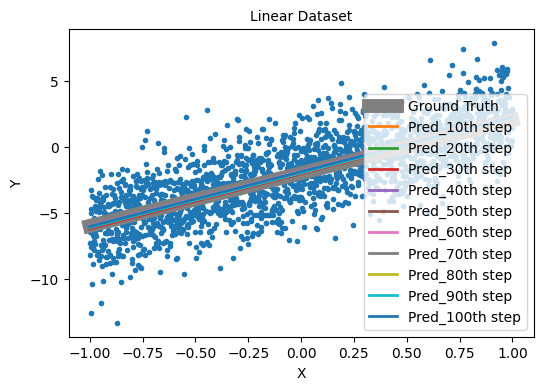

In [21]:
# plot the result: linear regressor

plt.figure(figsize=(6, 4))  # 그래프 크기를 가로 6인치, 세로 4인치로 설정

### 데이터셋을 산점도로 그리기
plt.plot(x, y, '.')  # 생성된 데이터 포인트를 점으로 표시
# 이 점들은 노이즈가 포함된 실제 데이터 샘플, 모델이 이를 기반으로 최적의 직선을 찾는 것.

### Ground Truth(정답) 회귀선과 학습된 모델의 예측 선 플롯
plt.plot(x_range, x_range * gt_w + gt_b, linewidth=10,
         color=[0.5, 0.5, 0.5], label='Ground Truth')
# Ground Truth 회귀선을 회색(두께: 10)으로 그려서 정답을 시각적으로 표시

# 저장된 가중치와 편향을 사용해 각 단계(epoch별)의 예측 결과를 그림
for idx, (w, b) in enumerate(zip(saved_w, saved_b)):
    plt.plot(x_range, x_range * w + b, linewidth=2,
             label='Pred_{}th step'.format(10 * (idx + 1)))
    # 매 10 epoch마다 저장된 가중치와 편향으로 예측된 회귀선을 플롯

### 그래프 제목 및 축 레이블 설정
plt.title('Linear Dataset', fontsize=10)  # 그래프 제목 설정
plt.xlabel('X', fontsize=10)  # X축 레이블 설정
plt.ylabel('Y', fontsize=10)  # Y축 레이블 설정

plt.legend()  # 범례를 표시해 각 회귀선의 의미를 명확히 함 (Ground Truth와 각 단계별 예측 선(Pred_nth step)이 포함)
plt.show()  # 그래프를 화면에 출력


파란 색 점들은 실제로 생성된 데이터 점들로 노이즈가 포함되어 있으며, 산점도를 나타낸다.    

회색 선은 실제 linear regression식 (ground truth)이다. 모델이 학습을 통해 이 선에 가까워지도록 가중치와 편향을 조정한다.    



초기 단계에서는 예측 선이 데이터와 정답 선에서 멀리 떨어져 있지만, epoch가 진행됨에 따라 점점 더 정확한 예측을 수행한다.       
이를 통해 모델이 손실을 줄이며 최적의 가중치와 편향에 수렴하는 과정을 명확히 확인할 수 있다.


# **Exercise**

implement a linear regression model not usin built-in functions
- nn.MSELoss(), backward() 사용 금지

- 수정된 코드는 결과값이 똑같아야함

In [22]:
# 가중치와 편향 초기화 (기울기 계산 활성화)
pred_w = torch.randn(1, requires_grad=True)
pred_b = torch.randn(1, requires_grad=True)

# 학습률과 에포크 정의
learning_rate = 1e-2
max_epoch = 100

# 손실 값 저장 리스트 초기화
loss_saver = list()
saved_w = []
saved_b = []

# MSE 손실 함수 직접 구현
def mse_loss(pred_y, true_y):
    '''
    MSE 손실 함수 구현: (1/N) * Σ(y_hat - y)^2
    pred_y : 예측된 y 값
    true_y : 실제 y 값
    '''
    return torch.mean((pred_y - true_y) ** 2)

# 경사(gradient) 계산 함수 구현
def compute_gradients(pred_y, true_y, x):
    '''
    손실에 대한 가중치와 편향의 기울기 계산
    pred_y : 예측된 y 값
    true_y : 실제 y 값
    x : 입력 데이터
    '''
    error = pred_y - true_y  # 예측 오차
    grad_w = torch.mean(2 * error * x)  # 가중치에 대한 기울기 계산
    grad_b = torch.mean(2 * error)  # 편향에 대한 기울기 계산
    return grad_w, grad_b

# 학습 루프 시작
for epoch in range(max_epoch):
    total_loss = 0.0

    # DataLoader에서 미니배치 샘플 가져오기
    for idx, sample in enumerate(dataloader):
        # 예측 값 계산
        pred_y = pred_w * sample['x'] + pred_b

        # 손실 계산 (MSE)
        loss = mse_loss(pred_y, sample['y'])

        # 가중치와 편향에 대한 기울기 계산
        grad_w, grad_b = compute_gradients(pred_y, sample['y'], sample['x'])

        # 가중치와 편향 업데이트 (경사 하강법 적용)
        with torch.no_grad():
            pred_w -= learning_rate * grad_w
            pred_b -= learning_rate * grad_b

        # 손실 값 누적
        total_loss += loss.item() / len(dataloader)

    # 손실 저장
    loss_saver.append(total_loss)

    # 매 10 epoch마다 결과 출력 및 저장
    if (epoch + 1) % 10 == 0:
        saved_w.append(pred_w.item())
        saved_b.append(pred_b.item())
        print('Epoch: {}, Loss: {:.4f}, pred_w: {:.4f}, pred_b: {:.4f}'.format(
            epoch + 1, total_loss, pred_w.item(), pred_b.item()))

# 최종 결과 출력
print('Final Prediction: pred_w = {:.4f}, pred_b = {:.4f}'.format(pred_w.item(), pred_b.item()))



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
sampled 407-th element.
sampled 985-th element.
sampled 318-th element.
sampled 1516-th element.
sampled 833-th element.
sampled 1071-th element.
sampled 785-th element.
sampled 1698-th element.
sampled 1215-th element.
sampled 654-th element.
sampled 1148-th element.
sampled 538-th element.
sampled 1066-th element.
sampled 328-th element.
sampled 310-th element.
sampled 1753-th element.
sampled 1456-th element.
sampled 1486-th element.
sampled 217-th element.
sampled 1599-th element.
sampled 562-th element.
sampled 1239-th element.
sampled 1206-th element.
sampled 1650-th element.
sampled 1302-th element.
sampled 88-th element.
sampled 800-th element.
sampled 173-th element.
sampled 21-th element.
sampled 1533-th element.
sampled 948-th element.
sampled 35-th element.
sampled 392-th element.
sampled 1024-th element.
sampled 1165-th element.
sampled 594-th element.
sampled 1009-th element.
sampled 1731-th element.
sampled 1986-th element.
sampled 128

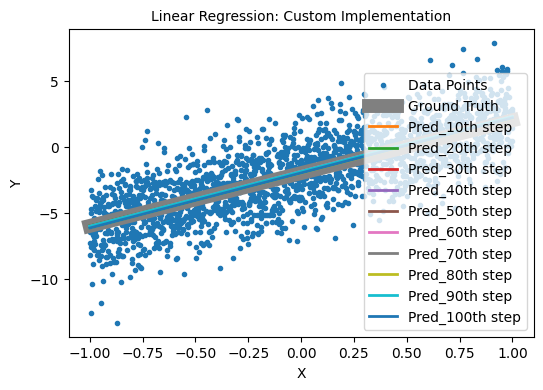

In [23]:
# 그래프 그리기
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

### 데이터셋을 산점도로 표시
plt.plot(x, y, '.', label='Data Points')  # 노이즈가 포함된 데이터 포인트

### Ground Truth (정답 회귀선) 표시
plt.plot(x_range, x_range * gt_w + gt_b, linewidth=10,
         color=[0.5, 0.5, 0.5], label='Ground Truth')  # 회색의 두꺼운 선으로 표시

### 각 단계(epoch별) 예측된 회귀선 그리기
for idx, (w, b) in enumerate(zip(saved_w, saved_b)):
    plt.plot(x_range, x_range * w + b, linewidth=2,
             label='Pred_{}th step'.format(10 * (idx + 1)))  # 매 10 epoch마다 회귀선 표시

### 그래프 제목과 축 레이블 설정
plt.title('Linear Regression: Custom Implementation', fontsize=10)  # 그래프 제목
plt.xlabel('X', fontsize=10)  # X축 레이블
plt.ylabel('Y', fontsize=10)  # Y축 레이블

plt.legend()  # 범례 표시
plt.show()  # 그래프 출력
